# K-means的应用——百货商场会员
在零售行业中，会员价值体现在持续不断地为零售运营商带来稳定的销售额和利润，同时也为零售运营商策略的制定提供数据支持
零售行业会采取各种不同方法来吸引更多的人成为会员，并且尽可能提高会员的忠诚度。

**背景**  
- 当前电商的发展使商场会员不断流失，给零售运营商带来了严重损失。此时，运营商需要有针对性地实施营销策略来加强与会员的良好关系
- 完善会员画像，使会员的形象更具体，帮助商家了解客户
- 加强对现有会员的精细化管理，提供个性化的服务，可与会员建立稳定的关系


![shoppingmall](image/shoppingmall.png)

**客户分析RFM模型**   
通过客户购买数据识别不同价值的客户，识别客户价值应用最广泛的模型是RFM模型。  
**R（Recency）**指的是最近一次消费时间与截止时间的间隔。通常情况下，最近一次消费时间与截止时间的间隔越短，对即时提供的商品或是服务也最有可能感兴趣。  
**F（Frequency）**指顾客在某段时间内所消费的次数。可以说消费频率越高的顾客，也是满意度越高的顾客，其忠诚度也就越高，顾客价值也就越大。  
**M（Monetary）**指顾客在某段时间内所消费的金额。消费金额越大的顾客，他们的消费能力自然也就越大，这就是所谓“20%的顾客贡献了80%的销售额”的二八法则。  


RFM模型包括三个特征，使用三维坐标系进行展示，如图所示。X轴表示Recency，Y轴表示Frequency，Z轴表示Monetary，每个轴一般会分成5级表示程度，1为最小，5为最大。


![RFMmodel](image/RFM_model.png)

**数据信息**如下：  
销售流水表记录的是该商场的销售数据，其中包括会员与非会员的消费数据  
数据时间范围是2015年1月1日至2018年1月3日
![shoppingmall_data](image/shoppingmall_data.png)

**目标**：  
- 对商场的经营数据和会员信息数据进行处理
- 分析商场的经营特征
- 对商场会员进行用户画像描绘，方便更了解会员，对会员进行针对性的服务
- 根据会员的消费特征对会员进行精细划分，方便针对不同群体制定对应的营销策略或管理方案，从而提升商场的销售利润


## 读取数据

In [1]:
import pandas as pd
data = pd.read_csv('数据/sales.csv', encoding='gbk')
data.head()

,会员卡号,此次消费的会员积分,积分等级,年龄,年龄段,入会时长,消费次数,消费频率,消费金额,消费水平,平均每单金额,价值属性,最后一次消费距今时长,柜组名称
0,000186fa,5267.0,积分低等级,41,中年,977,4,低频消费,11880.7,中等消费水平,2970.175000,单均价值一般,101,雅诗兰黛ESTEE LAUDER
1,000234ad,11850.0,积分中等级,43,中年,1097,7,中频消费,12850.0,中等消费水平,1835.714286,单均价值一般,63,雅诗兰黛柜
2,000339f1,6141.0,积分低等级,30,青年,1010,8,中频消费,6340.8,低消费水平,792.600000,单均价值一般,18,Wacoal
3,0004bad2,8964.0,积分低等级,34,青年,69,1,低频消费,8964.0,低消费水平,8964.000000,单均价值高,69,朗姿柜
4,000cd735,66423.0,积分中等级,55,中年,1056,40,高频消费,123759.5,高消费水平,3093.987500,单均价值一般,39,OHUI/后


In [2]:
data.shape

(31301, 14)

通过数据观察，本案例以消费次数F，消费总金额M，最近消费距今时长R和入会时长L,4个特征作为百货公司识别客户价值的关键特征，记为LRFM模型。

In [14]:
X = data[['消费次数','最后一次消费距今时长','消费金额','入会时长']]
X.head()

,消费次数,最后一次消费距今时长,消费金额,入会时长
0,4,101,11880.7,977
1,7,63,12850.0,1097
2,8,18,6340.8,1010
3,1,69,8964.0,69
4,40,39,123759.5,1056


## 数据标准化

In [19]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
feature = sc.fit_transform(X)
feature = pd.DataFrame(feature, columns=X.columns, index=X.index)

In [21]:
feature.head()

,消费次数,最后一次消费距今时长,消费金额,入会时长
0,-0.162766,-0.852102,-0.123851,0.766248
1,0.238058,-0.953237,-0.105034,1.105873
2,0.371666,-1.073002,-0.231395,0.859645
3,-0.563591,-0.937268,-0.180472,-1.803583
4,4.647126,-1.017111,2.048021,0.989835


## K-means聚类算法

这里我们主观定义聚类后的簇数量为5，也就是分成5个类别

In [22]:
import pandas as pd
from  sklearn.cluster import KMeans
model = KMeans(n_clusters=5, random_state=0)

### 训练

In [23]:
model.fit(feature) 

KMeans(n_clusters=5, random_state=0)

### 训练结果

In [24]:
model.cluster_centers_ # 类中心

array([[ 0.35405089, -0.61558198,  0.04441617,  0.67136318],
       [-0.3221002 , -0.58831476, -0.18918965, -1.11544549],
       [-0.41060379,  1.27719539, -0.25501726,  0.71403056],
       [ 2.70992706, -0.94293576,  1.91191234,  0.54151326],
       [ 6.78682128, -1.08705261,  9.7763573 ,  0.71438857]])

In [25]:
model.labels_ # 聚类类别

array([0, 0, 0, ..., 0, 1, 2], dtype=int32)

In [26]:
pd.Series(model.labels_).value_counts() # 数量统计

1    11883
2    10334
0     7253
3     1695
4      136
dtype: int64

In [27]:
data['客户类别'] = model.labels_   # 给原始数据添加聚类标签

### 绘制雷达图

[ 0.35405089 -0.61558198  0.04441617  0.67136318  0.35405089]
[-0.3221002  -0.58831476 -0.18918965 -1.11544549 -0.3221002 ]
[-0.41060379  1.27719539 -0.25501726  0.71403056 -0.41060379]
[ 2.70992706 -0.94293576  1.91191234  0.54151326  2.70992706]
[ 6.78682128 -1.08705261  9.7763573   0.71438857  6.78682128]


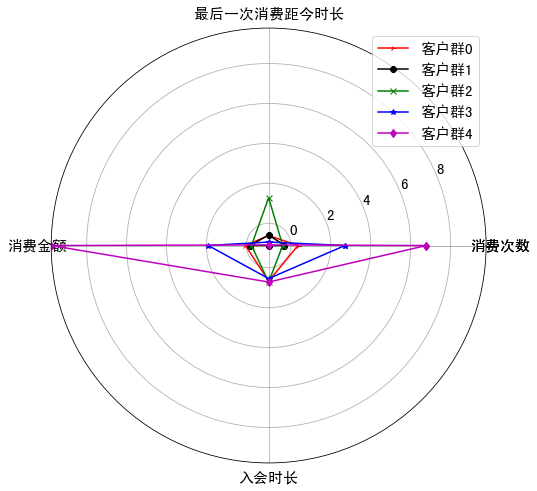

In [28]:
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号


# 绘制雷达图，传入参数1：model_center(聚类中心)，参数2：label(特征名字)
def radarplot(model_center=None, label=None):
    n = len(label)  # 特征个数
    # 对labels进行封闭，否则会有因为matplotlib版本引起的错误
    label = np.concatenate((label, [label[0]]))
    # 间隔采样，设置雷达图的角度，用于平分切开一个圆面,endpoint设置为False表示随机采样不包括stop的值
    angles = np.linspace(0, 2 * np.pi, n, endpoint=False)
    # 拼接多个数组，使雷达图一圈封闭起来
    angles = np.concatenate((angles, [angles[0]]))
    # 创建一个空白画布
    fig = plt.figure(figsize=(8, 8))
    # 创建子图，设置极坐标格式，绘制圆形
    ax = fig.add_subplot(1, 1, 1, polar=True)
    # 添加每个特征的标签
    ax.set_thetagrids(angles * 180 / np.pi, label)
    # 设置y轴范围
    ax.set_ylim(model_center.min(), model_center.max())
    # 添加网格线
    ax.grid(True)
    # 设置备选的折线颜色和样式,防止线条重复
    sam = ['r','0','g','b','m','y','k','p','c']
    mak = ['4','8','x','*','d','_','.','+','|']
    labels = []
    # 循环添加每个类别的线圈
    for i in range(len(model_center)):
        values = np.concatenate((model_center[i], [model_center[i][0]]))
        print(values)
        ax.plot(angles, values, c=sam[i], marker=mak[i])
        plt.yticks(fontsize=15)
        plt.xticks(fontsize=15)
        labels.append('客户群' + str(i))
    plt.legend(labels,fontsize=15)
# 聚类的雷达图
radarplot(model.cluster_centers_ , feature.columns)

根据数据情况，选择使用Kmeans算法将客户分成5个类别。   
结合业务分析，通过比较各个特征在群间的大小对某一个群的特征进行评价分析，从而总结出每个群的优势和弱势特征。

### 会员管理方案   

In [50]:
s = pd.Series(model.labels_).value_counts()
s = s/s.sum()
s.index = ['重要保持客户', '低价值客户', '一般价值客户', '流失客户', '重要发展客户']
s.name = '聚类类别'
s

重要保持客户    0.379636
低价值客户     0.330149
一般价值客户    0.231718
流失客户      0.054152
重要发展客户    0.004345
Name: 聚类类别, dtype: float64

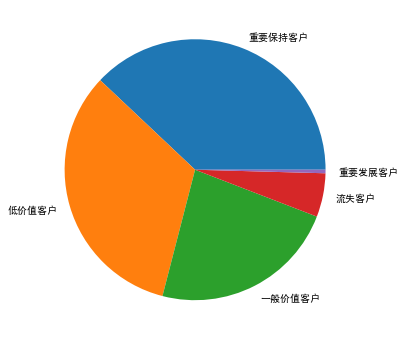

In [49]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6,6))
ax.pie(s, labels=s.index)
plt.show()

根据对各个客户群进行特征分析，采取下面的一些营销手段和策略，为百货公司的客户管理提供参考。   
**低价值客户**，购买力有限，入会一段时间后不再购买商品，可以通过广告、品牌折扣、类目更新等勾起客户兴趣，制造品牌效应，增加互动拉新促活为主。   
**一般价值客户**，刚入会的客户，对产品认知度不够，已经有一段时间未进行购买，跟低价值客户一样以增加互动拉新促活为主。   
**流失客户**，此类客户购买力很低，购买频率不高，且数量不多，可以直接丢弃。   
**重要发展客户**，处于新会员阶段，购买力中等，可以提供相似商品的优惠、服务等级提升、免费送货上门等方式，促进消费为主。   
**重要保持客户**，处于新会员阶段，但购买力十足，应按照超级VIP的待遇进行管理，按周、按月发送当季新品、商品折扣、服务升级等，以增加用户粘性。